In [1]:
import matplotlib

from sectional_v2.data_info import get_nice_name_case
from sectional_v2.util.imports.import_fields_xr_v2 import import_constants
from sectional_v2.util.imports.get_fld_fixed import get_field_fixed
from useful_scit.imps import (np, xr, plt, pd)

# load and autoreload
from IPython import get_ipython

# noinspection PyBroadException
from sectional_v2.util.naming_conventions import var_info
from sectional_v2.util.naming_conventions.var_info import get_fancy_var_name

try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME/
/home/ubuntu/mnts/nird/projects/SECTIONAL_v2/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model = 'NorESM' 

In [3]:

from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders

plot_path = get_plotpath('comparison') + '/scatter/'
print(plot_path)
make_folders(plot_path)

/home/ubuntu/mnts/nird/projects//Plots_SECTIONAL_SCHEME/global_comparison//scatter/


In [4]:
from_time = '2008-01'
to_time = '2008-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = False  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
#if avg_over_lev:
#    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

lev_lim =0.

In [5]:
cases_sec = ['SECTv21_ctrl_koagD']#, 'PD_SECT_CHC7_diurnal']  # Sect ac eq.20, corr NPF diam, fxdt, vdiam, 1.5xBVOC']
cases_orig = ['noSECTv21_ox_ricc_dd']  # , 'Original eq.18','Original eq.20, 1.5xBVOC','Original eq.20, rednuc']
#cases_orig = ['noSECTv21_default_dd']  # , 'Original eq.18','Original eq.20, 1.5xBVOC','Original eq.20, rednuc']
cases = cases_orig + cases_sec

In [6]:
var_subl = ['NCONC01', 'H2SO4','SOA_LV','N_AER','COAGNUCL','NUCLRATE','GR','PBLH']#,'SOA_NA','SO4_NA']

In [7]:
var1 = var_subl[0]
var2 = var_subl[1]
cases_dic ={}
for case in cases:
    dummy = get_field_fixed(case,
                            var_subl,
                            from_time, to_time,
                            pressure_adjust=pressure_adjust)
    print(dummy)
    ds_constants = import_constants(case)
    
    dummy = xr.merge([dummy, ds_constants])
    cases_dic[case] = dummy.copy()

<xarray.DataArray 'time' (time: 12)>
array([396., 425., 456., 486., 517., 547., 578., 609., 639., 670., 700., 731.])
Coordinates:
  * time     (time) float64 396.0 425.0 456.0 486.0 ... 639.0 670.0 700.0 731.0
Attributes:
    long_name:  time
    units:      days since 2007-01-01 00:00:00
    calendar:   gregorian
    bounds:     time_bnds
<xarray.DataArray 'time' (time: 12)>
array(['2008-01-17T00:00:00.000000000', '2008-02-15T00:00:00.000000000',
       '2008-03-17T00:00:00.000000000', '2008-04-16T00:00:00.000000000',
       '2008-05-17T00:00:00.000000000', '2008-06-16T00:00:00.000000000',
       '2008-07-17T00:00:00.000000000', '2008-08-17T00:00:00.000000000',
       '2008-09-16T00:00:00.000000000', '2008-10-17T00:00:00.000000000',
       '2008-11-16T00:00:00.000000000', '2008-12-17T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-01-17 2008-02-15 ... 2008-12-17
Attributes:
    long_name:  time
    bounds:     time_bnds
Returnin

In [8]:
# select values close to surface:
for case in cases:
    _ds = cases_dic[case]
    _ds = _ds.sel(lev=slice(lev_lim,None))#sel(lev=slice(20,None))
    cases_dic[case] = _ds

In [9]:
for var in ['H2SO4','SOA_LV']:
    for case in cases:
        _ds = cases_dic[case]
        _ds.load()
        if _ds[var].units=='mol/mol':
            _ds[var] = _ds[var]*1e12
            _ds[var].attrs['units']='ppt'

In [10]:
for case in cases:
    _ds = cases_dic[case]
    coagn = 'COAGNUCL'
    if _ds[coagn].units=='/s':
        _ds[coagn] = _ds[coagn]*60*60
        _ds[coagn].attrs['units']='hour$^{-1}$'
        print('hey')
var = var1
dummy
case_sec = cases_sec[0]
case_orig = cases_orig[0]
ds_diff = (cases_dic[case_sec]- cases_dic[case_orig])#.isel(lev=slice(20,None))
for var in var_subl:
    ds_diff[var+'_'+case_sec] = cases_dic[case_sec][var]#.isel(lev=slice(20,None))
    ds_diff[var+'_'+case_orig] = cases_dic[case_orig][var]#.isel(lev=slice(20,None))
ds_diff.load()
for var in var_subl:
    for case in cases:
        ds_diff[f'log{var}_{case}'] = np.log10(ds_diff[f'{var}_{case}'])#+'_'+ case_orig])

hey
hey


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


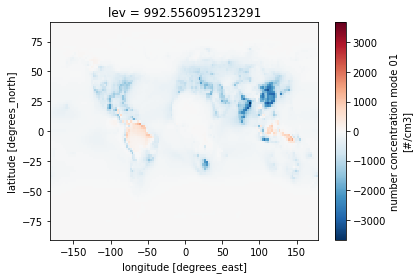

In [11]:
ds_diff['NCONC01'].mean('time').isel(lev=-1).plot()
plt.show()

In [12]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
def _plt_2dhist(ds_diff, xvar, yvar, nr_bins=40, yscale='symlog', xscale='log',
                xlim = [1e-6,1e-2],ylim=[5.,1e3], ax=None):
    """
    xvar = f'NUCLRATE_{case_orig}'
    yvar='NCONC01'
    xlim = [1e-6,1e-2]
    ylim=[1,1e3]
    nr_bins = 40
    yscale='symlog'
    xscale='log'
    """
    print(xlim)
    print(ylim)
    varList = [xvar, yvar]#f'NUCLRATE_{case_orig}',f'logNUCLRATE_{case_orig}',f'logSOA_LV_{case_orig}',f'logH2SO4_{case_orig}',f'logNCONC01_{case_orig}',f'logN_AER_{case_orig}',f'N_AER_{case_orig}',f'H2SO4_{case_orig}','NCONC01']
    dims = tuple(ds_diff[varList].dims)
    _ds_s = ds_diff[varList].stack(ind=dims)#('lat','lon','lev','time'))


    ybins = mk_bins(ylim[0], vmax = ylim[1], nr_bins=nr_bins, scale=yscale)
    xbins = mk_bins(xlim[0],vmax=xlim[1], nr_bins=nr_bins, scale=xscale)
    data=_ds_s.to_dataframe()
    lim=0
    #data = -data[(data['NCONC01']<lim)]# | (data['NCONC01']>=lim)]
    x=data[xvar]#f'NUCLRATE_{case_orig}']
    y=data[yvar]#'NCONC01']
    if ax is None:
        fig, ax = plt.subplots(1)
    h =ax.hist2d(x,y,bins=[xbins,ybins], cmap='Reds')#,extent=[-3,3,-300,20],yscale='symlog')
    plt.colorbar(h[3], ax=ax, format = OOMFormatter(4, mathText=False))
    #cb = fig.colorbar(c, ax=ax)
    if yscale =='symlog':
        ax.set_yscale('symlog', linthreshy=ylim[0], linscaley=ylim[0]/10,subsy=[2,3,4,5,6,7,8,9])
        yt = ax.get_yticks()
        ml = np.abs(yt[yt!=0]).min()
        ytl = yt
        ytl[(yt==ml)|(yt==-ml)]=None
        ax.set_yticks(ticks=yt)#[y for y in yt if y!=0])#,
        ax.set_yticklabels(ytl)#[-1e2,-1e1,-1e0,1e0,1e1,1e2])


    elif yscale =='log':
        print('set log scale')
        ax.set_yscale('log')#, linthreshy=ylim[0], linscaley=ylim[0]/10,subsy=[2,3,4,5,6,7,8,9])
        
    #ax.set_yticks([y for y in yt if y!=0])#[-1e2,-1e1,-1e0,1e0,1e1,1e2])
    ax.set_xscale('log')
    return ax
    #plt.show()

def mk_bins(v, vmax = 1e3, nr_bins=20, scale='symlog'):
    if scale=='symlog':
        ybins = np.geomspace(v, vmax, int(nr_bins)/2)
        ybins = ybins - ybins[0]
        ybins = [*-ybins[::-1], *ybins[1:]]
    elif scale=='log':
        ybins = np.geomspace(v, vmax, nr_bins)
    elif scale=='neglog':
        ybins = -np.geomspace(v, vmax, nr_bins)[::-1]

    return ybins


class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

In [13]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [18]:
def _plt_tmp(_ds,axs,var_xl, var_diff, xlims,ylim=[5.,1e3], yscale='symlog', case_base = case_orig, case_oth=case_sec):
    for var,ax in zip(var_xl, axs.flatten()):
        print(var)
        xlim = xlims[var]
        h = _plt_2dhist(_ds,f'{var}_{case_base}', var_diff,
                nr_bins=40,
                xlim=xlim, ax=ax,
                        ylim=ylim,
                       yscale=yscale)
        uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
        ax.set_xlabel(f'{get_fancy_var_name(var)} [{uni}]')
        ax.plot(xlim,[0,0], linewidth=.5, c='k')

    uni = var_info.get_fancy_unit_xr(_ds[var_diff],
                           var_diff)
    fvar_diff = get_fancy_var_name(var_diff)
    ylab = f'$\Delta${fvar_diff} [{uni}]'
    for ax in axs[:,0]:
        ax.set_ylabel(ylab)
    
    subp_insert_abc(axs)

    suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_base)} vs.  '
    suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_oth)}, $m_2=${get_nice_name_case(case_base)}'
    fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
    stit = fig.suptitle(suptit,  fontsize=12, y=.98)
    
    return stit

In [15]:
def _plt_tmp_mv1v2(_ds,axs,var_xl, xlims, yscale='log', case_base = case_orig, case_oth = case_sec):
    for var,ax in zip(var_xl, axs.flatten()):
        print(var)
        xlim = xlims[var]
        h = _plt_2dhist(_ds,f'{var}_{case_base}', f'{var}_{case_oth}',
                        nr_bins=40,
                        xlim=xlim, 
                        ax=ax,
                        ylim=xlim,
                       yscale=yscale)
        uni = var_info.get_fancy_unit_xr(_ds[var],
                                     var)
        ax.set_xlabel(f'{get_fancy_var_name(var)},{get_nice_name_case(case_base)} [{uni}]')
        ax.set_ylabel(f'{get_fancy_var_name(var)},{get_nice_name_case(case_oth)} [{uni}]')
        #ax.plot(xlim,[0,0], linewidth=.5, c='k')
        ax.set_ylim(xlim)
        ax.set_ylim(xlim)
    
    subp_insert_abc(axs)

    suptit =f'{get_nice_name_case(case_sec)}-{get_nice_name_case(case_base)} vs.  '
    suptit =f'{fvar_diff}$(m_1)-${fvar_diff}$(m_2)$ vs. $X(m_2)$ \n for $m_1=${get_nice_name_case(case_sec)}, $m_2=${get_nice_name_case(case_base)}'
    fig.subplots_adjust(hspace=.5, wspace=0.1)#,top=0.8, )
    stit = fig.suptitle(suptit,  fontsize=12, y=.98)
    
    return stit

# Difference:


## Main plot: below 100 hPa:

In [ ]:
_ds

In [112]:
import seaborn as sns

<xarray.DataArray 'NCONC01' (N_AER: 15, GR: 15)>
array([[1.85949039e+00, 1.86637783e+00, 1.88714683e+00, 1.88208723e+00,
        1.95217562e+00,            nan,            nan, 3.06694061e-01,
        2.27449790e-01, 2.05647990e-01, 6.01707637e-01, 5.61531961e-01,
        4.93683487e-01, 1.18993163e+00,            nan],
       [2.75408101e+00, 2.73801064e+00, 2.73350406e+00, 2.70943594e+00,
        2.98017836e+00,            nan, 4.80662763e-01, 4.66690361e-01,
        3.44892025e-01, 3.56286854e-01, 8.68988276e-01, 7.63964117e-01,
        7.79801965e-01, 1.46595526e+00,            nan],
       [3.97306705e+00, 4.05639839e+00, 4.09769678e+00, 4.01001835e+00,
        3.98143721e+00, 4.63205338e+00, 5.73887765e-01, 7.78346360e-01,
        6.15094125e-01, 6.20607316e-01, 1.04381895e+00, 9.92158532e-01,
        1.53609276e+00, 1.85543835e+00, 2.82369757e+00],
       [5.43818760e+00, 5.63054276e+00, 5.92458344e+00, 5.96377468e+00,
        5.82099485e+00, 5.73147774e+00, 9.97450411e-01, 1.13

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


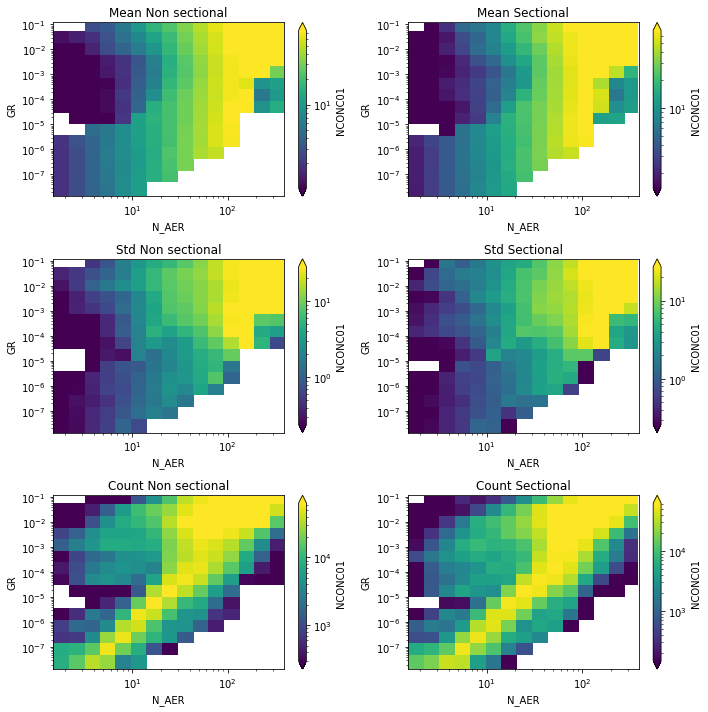

In [113]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['H2SO4','SOA_LV','NCONC01']
varList = ['N_AER','GR','NCONC01']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log')
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_ns_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_s_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log', xedges=xedges, yedges=yedges)

plt.tight_layout()
plt.show()
#pl_xr_ns

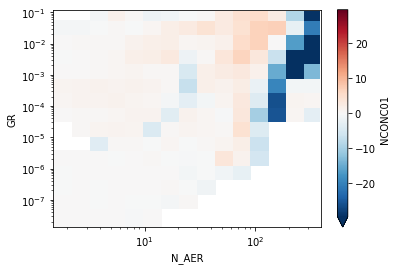

In [114]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

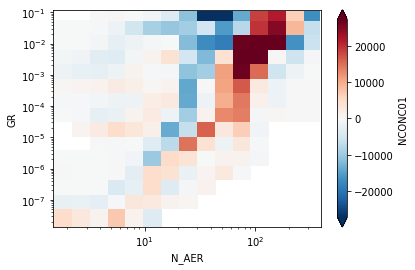

In [115]:
(pl_xr_s_c -pl_xr_ns_c).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

<xarray.DataArray 'NCONC01' (GR: 15, COAGNUCL: 15)>
array([[  1.8431938 ,   2.714751  ,   3.8944764 ,   5.311358  ,
          7.659269  ,  10.77448   ,  13.654125  ,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [  1.8550084 ,   2.7027502 ,   3.9553123 ,   5.5288    ,
          7.498705  ,  10.462562  ,  14.073809  ,  19.522156  ,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [  1.8761476 ,   2.6859243 ,   4.038336  ,   5.8122487 ,
          7.720828  ,  10.228143  ,  14.7857    ,  21.282688  ,
         31.234627  ,  35.3024    ,          nan,          nan,
                 nan,          nan,          nan],
       [  1.8527166 ,   2.6871438 ,   3.9491792 ,   5.745294  ,
          8.185803  ,  10.62794   ,  14.562474  ,  22.176165  ,
         30.933296  ,  43.284397  ,  51.20677   ,          nan,
                 nan,      

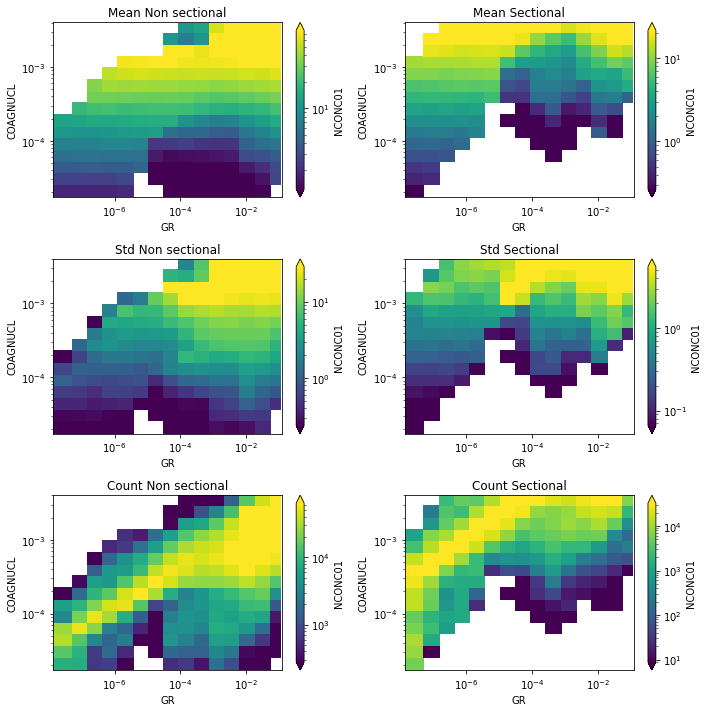

In [116]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['H2SO4','SOA_LV','NCONC01']
varList = ['GR','COAGNUCL','NCONC01']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log')
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_ns_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_s_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log', xedges=xedges, yedges=yedges)

plt.tight_layout()
plt.show()
#pl_xr_ns

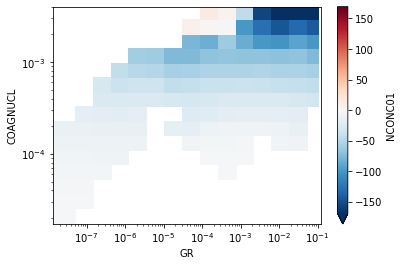

In [117]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

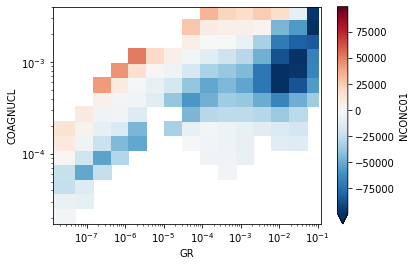

In [118]:
(pl_xr_s_c -pl_xr_ns_c).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

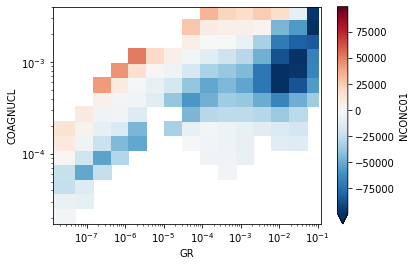

In [119]:
(pl_xr_s_c -pl_xr_ns_c).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

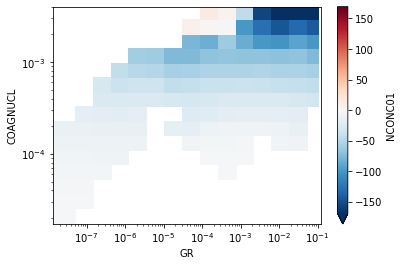

In [120]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                        ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

<xarray.DataArray 'NCONC01' (N_AER: 15, GR: 15)>
array([[  1.9350255 ,   1.9239151 ,   1.9482793 ,   2.020896  ,
          1.8744966 ,          nan,   0.5486771 ,   0.55904436,
          0.72595775,   1.0631486 ,   0.7223068 ,   0.5726727 ,
          0.72345877,   0.64912516,          nan],
       [  2.8208017 ,   2.798643  ,   2.796683  ,   2.7228742 ,
          2.9356298 ,          nan,   0.87628174,   0.77518773,
          1.1441265 ,   1.4062576 ,   1.0969023 ,   0.8909446 ,
          1.218958  ,   0.9233306 ,   0.95079476],
       [  3.9965134 ,   4.0634456 ,   4.1086745 ,   4.112969  ,
          3.94972   ,   4.463032  ,   1.3053799 ,   1.1382903 ,
          1.6334265 ,   1.8198045 ,   1.4948922 ,   1.400695  ,
          1.9298371 ,   1.635499  ,   2.2377849 ],
       [  5.5124784 ,   5.659045  ,   5.911546  ,   5.973686  ,
          5.730557  ,   5.7065606 ,   1.9560184 ,   1.8049163 ,
          2.2204285 ,   2.227358  ,   1.9810591 ,   2.024738  ,
          2.949265  ,   3.0601

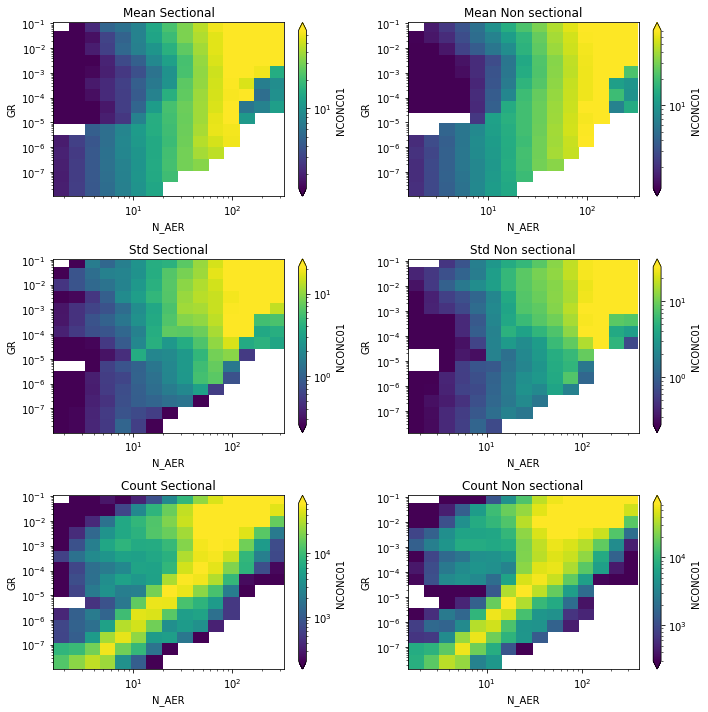

In [121]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['N_AER','GR','NCONC01']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log')
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log')
plt.tight_layout()
plt.show()
#pl_xr_ns

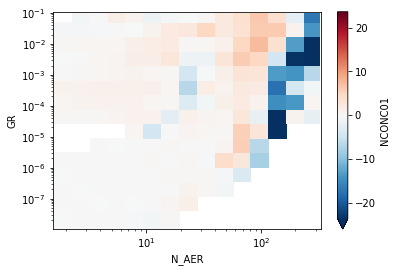

In [122]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

<xarray.DataArray 'H2SO4' (N_AER: 15, NCONC01: 15)>
array([[1.6942530e-06, 7.4553458e-07,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan],
       [3.0200212e-04, 5.3547042e-06, 1.6097306e-06,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan],
       [1.3171727e-03, 7.2734611e-04, 2.7780075e-05, 3.7218476e-06,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan,           nan,
                  nan,           nan,           nan],
       [1.0700459e-03, 1.2836910e-03, 1.2269786e-03, 1.2541816e-04,
        8.1971502e-06,           nan,           nan,           nan,
                  nan,           nan, 

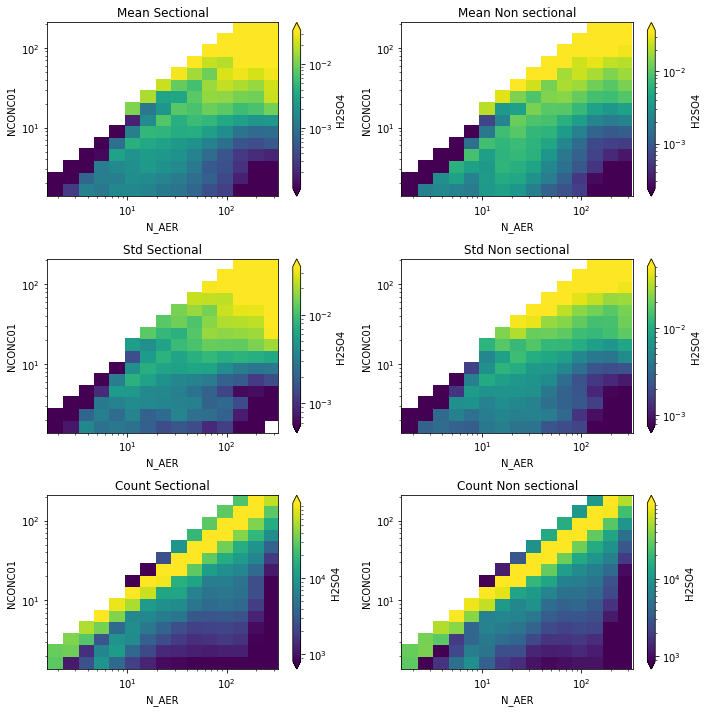

In [123]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['N_AER','NCONC01','H2SO4']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_s_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log', xedges=xedges, yedges=yedges)
df, pl_xr_ns_c,  kwargs, xedges, yedges =conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
plt.tight_layout()
plt.show()
#pl_xr_ns

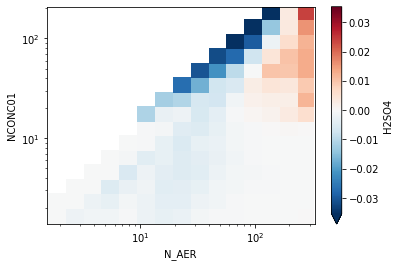

In [124]:
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()

In [125]:
for case in cases:
    _ds = cases_dic[case]
    _ds['N_nt01'] = _ds['N_AER']-_ds['NCONC01']
    _ds['N_nt01'] = _ds['N_nt01'].where(_ds['N_nt01']>0)

<xarray.DataArray 'SOA_LV' (H2SO4: 15, NCONC01: 15)>
array([[3.67415042e-14, 4.75233121e-14, 3.86848858e-14, 1.25983039e-14,
        9.53281203e-15, 6.51116530e-14, 8.91729385e-14, 7.81975016e-13,
        1.44423015e-12, 3.32727444e-12,            nan,            nan,
                   nan,            nan,            nan],
       [7.65696642e-14, 1.16766568e-13, 2.98781302e-08, 8.62128362e-14,
        3.93959022e-14, 9.74889318e-14, 2.03405123e-13, 3.92476936e-12,
        2.57405503e-11, 1.57191149e-10, 3.49826335e-10,            nan,
                   nan,            nan,            nan],
       [3.86753709e-06, 5.59245700e-06, 3.98537850e-06, 5.02344506e-07,
        3.72927929e-08, 1.52693721e-13, 4.21906813e-13, 4.87358027e-12,
        7.34429531e-11, 4.96295893e-10, 3.35082895e-09, 1.49652096e-10,
                   nan,            nan,            nan],
       [2.23240149e-05, 3.64559528e-05, 3.96348805e-05, 1.48849167e-05,
        4.88492424e-06, 1.48495998e-08, 1.80864046e-09, 

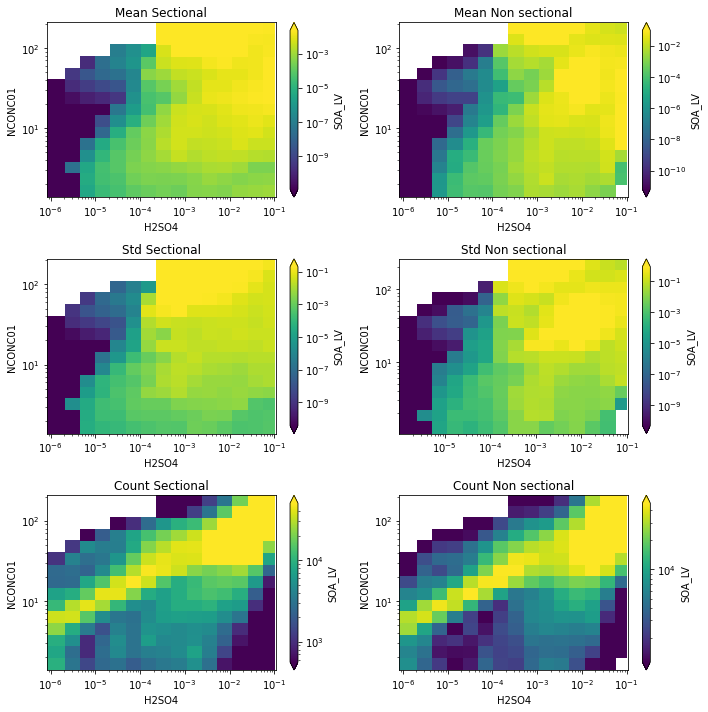

In [126]:
import importlib as il
from useful_scit.util import conditional_stats
il.reload(conditional_stats)
varList = ['H2SO4','NCONC01','SOA_LV']
sec_sub = cases_dic[case_sec][varList].stack(ind=('lat','lon','lev','time'))#
#sec_sub = sec_sub
nosec_sub = cases_dic[case_orig][varList].stack(ind=('lat','lon','lev','time'))
fig, axs = plt.subplots(3,2, figsize=[10,10])
axs=axs.flatten()
df, pl_xr_s,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[0],quant=0.1,scale='log', stat='mean',  plt_title='Mean Sectional',     cscale='log')
df, pl_xr_ns,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[1],quant=0.1,scale='log', stat='mean',  plt_title='Mean Non sectional', cscale='log', xedges=xedges, yedges=yedges)
conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[2],quant=0.1,scale='log', stat='std',   plt_title='Std Sectional',      cscale='log')
conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[3],quant=0.1,scale='log', stat='std',   plt_title='Std Non sectional',  cscale='log')
df, pl_xr_s_c,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(sec_sub,  varList,axs[4],quant=0.1,scale='log', stat='count', plt_title='Count Sectional',    cscale='log')
df, pl_xr_ns_c,  kwargs, xedges, yedges = conditional_stats.plot_cond_statistic(nosec_sub,varList,axs[5],quant=0.1,scale='log', stat='count', plt_title='Count Non sectional',cscale='log', xedges=xedges, yedges=yedges)
plt.tight_layout()
plt.show()
#pl_xr_ns

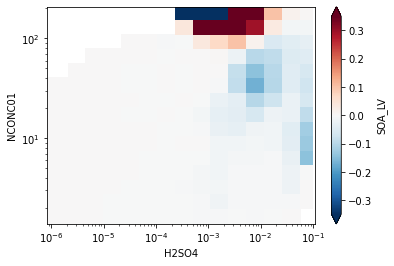

In [127]:
from useful_scit.util.zarray import corr
(pl_xr_s -pl_xr_ns).plot(x=varList[0],y=varList[1],xlim=kwargs['xlim'], robust=True,
                         ylim=kwargs['ylim'], yscale='log',xscale='log')

plt.show()